# Mentions of Brexit-Related Words Over Time

In [1]:
from collections import Counter
import os
import numpy as np
import matplotlib.pyplot as plt
import re
from datetime import datetime
import collections

## Debates per month 

We first viewed how often a debate takes place to get an idea of when to expect more frequent appearences of words. 


In [2]:
dataset_path = '/Users/caoimherosemartin/Desktop/dates.txt'
dates = list()
with open(dataset_path, encoding="utf8") as textfile:
    reader = textfile.read()
    #next(reader) # skips header line
    for item in reader.split(','):
        x = re.findall(r"\d*-\d*-\d*", item)
        dates.append(x[0])

In [3]:
def getyear(x):
    """passes in a string with date, returns year"""
    #convert it to datetime type
    a = datetime.strptime(x, '%Y-%m-%d')
    #take month from this 
    year = a.year
    return year

In [4]:
dates16 = [date for date in dates if getyear(date)==2016]
dates17 = [date for date in dates if getyear(date)==2017]
dates18 = [date for date in dates if getyear(date)==2018]
dates19 = [date for date in dates if getyear(date)==2019]

In [5]:
def getmonth(x):
    """passes in a string with date, returns month"""
    #convert it to datetime type
    a = datetime.strptime(x, '%Y-%m-%d')
    #take month from this 
    month = a.month
    return month

In [6]:
#2016 
l16 = []

for date in dates16:
    mon = getmonth(date)
    l16.append(mon)


freqs16 = {num:l16.count(num) for num in range(1,13)}
# none in august 
#freqs16[8]=0
#need to sort by key 

ord_freqs16 = collections.OrderedDict(sorted(freqs16.items(), key=lambda t: t[0]))




#2017 
l17 = []

for date in dates17:
    mon = getmonth(date)
    l17.append(mon)


freqs17 = {num:l17.count(num) for num in range(1,13)}
#freqs17[8]=0
#need to sort by key 

ord_freqs17 = collections.OrderedDict(sorted(freqs17.items(), key=lambda t: t[0]))


#2018 
l18 = []

for date in dates18:
    mon = getmonth(date)
    l18.append(mon)


freqs18 = {num:l18.count(num) for num in range(1,13)}
# none in august 
#freqs18[8]=0
#need to sort by key 

ord_freqs18 = collections.OrderedDict(sorted(freqs18.items(), key=lambda t: t[0]))


#2019 
l19 = []

for date in dates19:
    mon = getmonth(date)
    l19.append(mon)


freqs19 = {num:l19.count(num) for num in range(1,13)}
#freqs19[8]=0
#need to sort by key 

ord_freqs19 = collections.OrderedDict(sorted(freqs19.items(), key=lambda t: t[0]))

([<matplotlib.axis.XTick at 0x11bf51eb8>,
 <a list of 12 Text xticklabel objects>)

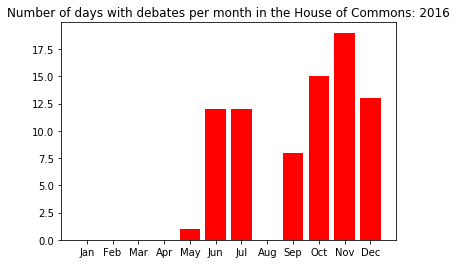

In [7]:
#2016
x16 = np.arange(12)
y16 = [val for key,val in ord_freqs16.items()]
months16 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.title('Number of days with debates per month in the House of Commons: 2016')
plt.bar(x16,y16, color = 'red')
plt.xticks(x16, months16)

([<matplotlib.axis.XTick at 0x11cb9ca20>,
 <a list of 12 Text xticklabel objects>)

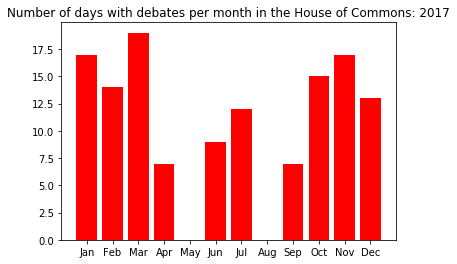

In [8]:
# 2017 
x17 = np.arange(12)
y17 = [val for key,val in ord_freqs17.items()]
months17 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.title('Number of days with debates per month in the House of Commons: 2017')
plt.bar(x17,y17, color = 'red')
plt.xticks(x17, months17)

([<matplotlib.axis.XTick at 0x11cc1cf28>,
 <a list of 12 Text xticklabel objects>)

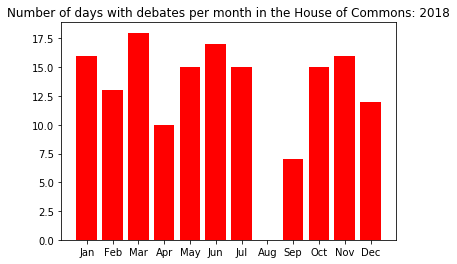

In [9]:
#2018
x18 = np.arange(12)
y18 = [val for key,val in ord_freqs18.items()]
months18 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.title('Number of days with debates per month in the House of Commons: 2018')
plt.bar(x18,y18, color = 'red')
plt.xticks(x18, months18)

([<matplotlib.axis.XTick at 0x11cd0b320>,
 <a list of 12 Text xticklabel objects>)

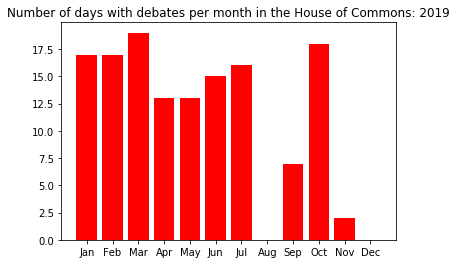

In [10]:
# 2019 
x19 = np.arange(12)
y19 = [val for key,val in ord_freqs19.items()]
months19 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.title('Number of days with debates per month in the House of Commons: 2019')
plt.bar(x19,y19, color = 'red')
plt.xticks(x19, months19)

## Top 5 Selected Brexit Buzzwords (total occurences)

### Filtering and retreiving data from each file

Each transcript starts and ends with a segment of text regarding cookies, privacy etc. We first remove thif from the file, also removing the occurrences of the word "Share" if it is surrounded by multiple spaces, as this indicates it is a share button, and not text to be taken into account.

In [11]:
#testing on one file 

def getdata(file):
    with open(file, encoding="utf8") as textfile:
        reader = textfile.read()
        #filtering out headings, ending, and share button 
        file_without_head = reader[867:-354] #start 867
        f = file_without_head.replace(" Share  ", '')
        wordcount = Counter(f.split())
        total_count = sum(wordcount.values())
        brexit = wordcount["Brexit"]
        anpr = wordcount["ANPR"]
        eea = wordcount["EEA"]
        cta = wordcount["CTA"]
        sch = wordcount["Schengen"]
        nodeal = wordcount["no-deal"]
        add_to_count = brexit + anpr + eea + cta + sch + nodeal
        return add_to_count

In [12]:

months_dict16 = {'1': 0, '2': 0, '3': 0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0, '10':0, '11':0, '12':0}
months_dict17 = {'1': 0, '2': 0, '3': 0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0, '10':0, '11':0, '12':0}
months_dict18 = {'1': 0, '2': 0, '3': 0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0, '10':0, '11':0, '12':0}
months_dict19 = {'1': 0, '2': 0, '3': 0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0, '10':0, '11':0, '12':0}

Group each file per month and extract occurences of the words 

In [13]:

for filename in os.listdir('/Users/caoimherosemartin/Desktop/project/TMCI-Project-Nov-2019/mentions/Dates'):
    if filename[:4] == '2016': 
        month = filename[5:7]
        if month[0]=='0':
            month = month[1]
        count = months_dict16[month]
        words = getdata(filename)
        newcount = count + words 
        months_dict16[month] = newcount
    if filename[:4] == '2017': 
        month = filename[5:7]
        if month[0]=='0':
            month = month[1]
        count = months_dict17[month]
        words = getdata(filename)
        newcount = count + words 
        months_dict17[month] = newcount
    if filename[:4] == '2018': 
        month = filename[5:7]
        if month[0]=='0':
            month = month[1]
        count = months_dict18[month]
        words = getdata(filename)
        newcount = count + words 
        months_dict18[month] = newcount
    if filename[:4] == '2019': 
        month = filename[5:7]
        if month[0]=='0':
            month = month[1]
        count = months_dict19[month]
        words = getdata(filename)
        newcount = count + words 
        months_dict19[month] = newcount



            
            
            
            
            
            
        
        

In [14]:
print(months_dict16)
print(months_dict17)
print(months_dict18)
print(months_dict19)

{'1': 0, '2': 0, '3': 0, '4': 0, '5': 1, '6': 387, '7': 936, '8': 0, '9': 461, '10': 1018, '11': 894, '12': 766}
{'1': 998, '2': 830, '3': 967, '4': 466, '5': 0, '6': 594, '7': 598, '8': 0, '9': 692, '10': 867, '11': 2077, '12': 1404}
{'1': 943, '2': 897, '3': 1238, '4': 448, '5': 571, '6': 1453, '7': 1427, '8': 0, '9': 494, '10': 1481, '11': 1947, '12': 3168}
{'1': 4760, '2': 4673, '3': 4987, '4': 1602, '5': 1229, '6': 1184, '7': 1156, '8': 0, '9': 2272, '10': 3381, '11': 32, '12': 0}


([<matplotlib.axis.XTick at 0x11ce02cf8>,
 <a list of 12 Text xticklabel objects>)

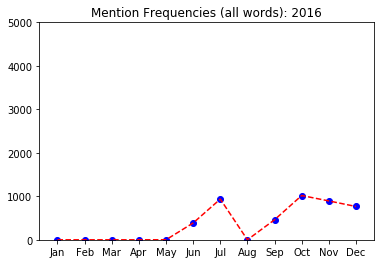

In [15]:
allx16 = np.arange(12)
ally16 = [val for key,val in months_dict16.items()]
months16 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.ylim(0, 5000)

plt.title('Mention Frequencies (all words): 2016')
plt.plot(allx16,ally16, color = 'red', linestyle = '--')
plt.scatter(allx16, ally16, color="blue")
plt.xticks(allx16, months16)

([<matplotlib.axis.XTick at 0x11d1d0160>,
 <a list of 12 Text xticklabel objects>)

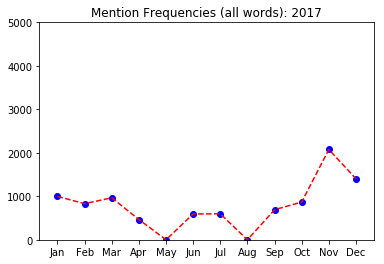

In [16]:
allx17 = np.arange(12)
ally17 = [val for key,val in months_dict17.items()]
months17 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.ylim(0, 5000)
plt.title('Mention Frequencies (all words): 2017')
plt.plot(allx17,ally17, color = 'red', linestyle = '--')
plt.scatter(allx17, ally17, color="blue")
plt.xticks(allx17, months17)

([<matplotlib.axis.XTick at 0x11e73d518>,
 <a list of 12 Text xticklabel objects>)

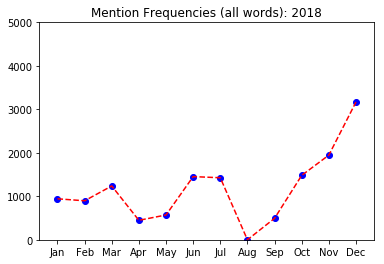

In [17]:
allx18 = np.arange(12)
ally18 = [val for key,val in months_dict18.items()]
months18 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.ylim(0, 5000)
plt.title('Mention Frequencies (all words): 2018')
plt.plot(allx18,ally18, color = 'red', linestyle = '--')
plt.scatter(allx18, ally18, color="blue")
plt.xticks(allx18, months18)

([<matplotlib.axis.XTick at 0x11e05dac8>,
 <a list of 12 Text xticklabel objects>)

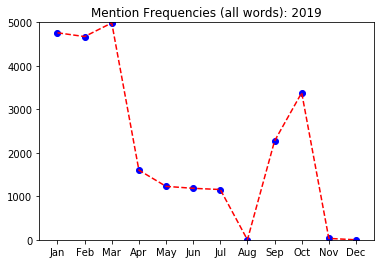

In [18]:
allx19 = np.arange(12)
ally19 = [val for key,val in months_dict19.items()]
months19 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.ylim(0, 5000)
plt.title('Mention Frequencies (all words): 2019')
plt.plot(allx19,ally19, color = 'red', linestyle = '--')
plt.scatter(allx19, ally19, color="blue")
plt.xticks(allx19, months19)

## Individual Word Occurences 

### 'Brexit'

In [19]:
def getdata_brexit(file):
    with open(file, encoding="utf8") as textfile:
        reader = textfile.read()
        #filtering out headings, ending, and share button 
        file_without_head = reader[867:-354] #start 867
        f = file_without_head.replace(" Share  ", '')
        wordcount = Counter(f.split())
        total_count = sum(wordcount.values())
        brexit = wordcount["Brexit"]
        return brexit

In [20]:
brexit_months_dict16 = {'1': 0, '2': 0, '3': 0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0, '10':0, '11':0, '12':0}
brexit_months_dict17 = {'1': 0, '2': 0, '3': 0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0, '10':0, '11':0, '12':0}
brexit_months_dict18 = {'1': 0, '2': 0, '3': 0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0, '10':0, '11':0, '12':0}
brexit_months_dict19 = {'1': 0, '2': 0, '3': 0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0, '10':0, '11':0, '12':0}

In [21]:


#grouping all files per month 
for filename in os.listdir('/Users/caoimherosemartin/Desktop/project/TMCI-Project-Nov-2019/mentions/Dates'):
    if filename[:4] == '2016': 
        month = filename[5:7]
        if month[0]=='0':
            month = month[1]
        count = brexit_months_dict16[month]
        words = getdata_brexit(filename)
        newcount = count + words 
        brexit_months_dict16[month] = newcount
    if filename[:4] == '2017': 
        month = filename[5:7]
        if month[0]=='0':
            month = month[1]
        count = brexit_months_dict17[month]
        words = getdata_brexit(filename)
        newcount = count + words 
        brexit_months_dict17[month] = newcount
    if filename[:4] == '2018': 
        month = filename[5:7]
        if month[0]=='0':
            month = month[1]
        count = brexit_months_dict18[month]
        words = getdata_brexit(filename)
        newcount = count + words 
        brexit_months_dict18[month] = newcount
    if filename[:4] == '2019': 
        month = filename[5:7]
        if month[0]=='0':
            month = month[1]
        count = brexit_months_dict19[month]
        words = getdata_brexit(filename)
        newcount = count + words 
        brexit_months_dict19[month] = newcount

In [22]:
print(brexit_months_dict16)
print(brexit_months_dict17)
print(brexit_months_dict18)
print(brexit_months_dict19)

{'1': 0, '2': 0, '3': 0, '4': 0, '5': 1, '6': 349, '7': 818, '8': 0, '9': 453, '10': 1000, '11': 865, '12': 743}
{'1': 934, '2': 784, '3': 843, '4': 462, '5': 0, '6': 592, '7': 590, '8': 0, '9': 618, '10': 696, '11': 1461, '12': 1308}
{'1': 883, '2': 721, '3': 1106, '4': 438, '5': 543, '6': 1151, '7': 1295, '8': 0, '9': 429, '10': 1073, '11': 1300, '12': 2081}
{'1': 2854, '2': 1972, '3': 2412, '4': 1072, '5': 723, '6': 616, '7': 662, '8': 0, '9': 1215, '10': 2328, '11': 28, '12': 0}


#### Graphs

([<matplotlib.axis.XTick at 0x11e9de048>,
 <a list of 12 Text xticklabel objects>)

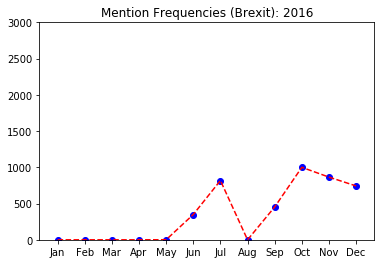

In [23]:
bx16 = np.arange(12)
by16 = [val for key,val in brexit_months_dict16.items()]
b_months16 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.ylim(0, 3000)
plt.title('Mention Frequencies (Brexit): 2016')
plt.plot(bx16,by16, color = 'red', linestyle = '--')
plt.scatter(bx16, by16, color="blue")
plt.xticks(bx16, b_months16)

([<matplotlib.axis.XTick at 0x11eb01080>,
 <a list of 12 Text xticklabel objects>)

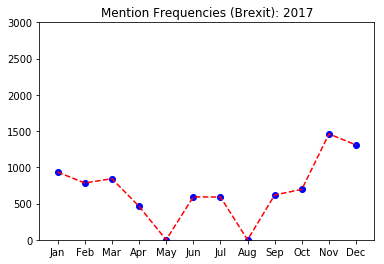

In [24]:
bx17 = np.arange(12)
by17 = [val for key,val in brexit_months_dict17.items()]
b_months17 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.ylim(0, 3000)
plt.title('Mention Frequencies (Brexit): 2017')
plt.plot(bx17,by17, color = 'red', linestyle = '--')
plt.scatter(bx17, by17, color="blue")
plt.xticks(bx17, b_months17)

([<matplotlib.axis.XTick at 0x11da0df98>,
 <a list of 12 Text xticklabel objects>)

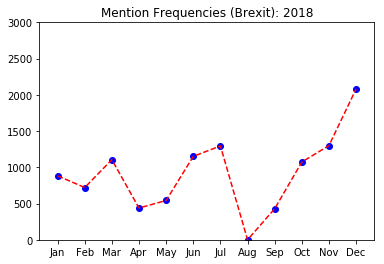

In [25]:
bx18 = np.arange(12)
by18 = [val for key,val in brexit_months_dict18.items()]
b_months18 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.ylim(0, 3000)
plt.title('Mention Frequencies (Brexit): 2018')
plt.plot(bx18,by18, color = 'red', linestyle = '--')
plt.scatter(bx18, by18, color="blue")
plt.xticks(bx18, b_months18)

([<matplotlib.axis.XTick at 0x10e21ca90>,
 <a list of 12 Text xticklabel objects>)

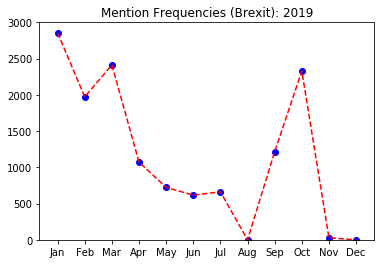

In [66]:
bx19 = np.arange(12)
by19 = [val for key,val in brexit_months_dict19.items()]
b_months19 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.ylim(0, 3000)
plt.title('Mention Frequencies (Brexit): 2019')
plt.plot(bx19,by19, color = 'red', linestyle = '--')
plt.scatter(bx19, by19, color="blue")
plt.xticks(bx19, b_months19)

### 'ANPR'

In [27]:
def getdata_anpr(file):
    with open(file, encoding="utf8") as textfile:
        reader = textfile.read()
        #filtering out headings, ending, and share button 
        file_without_head = reader[867:-354] #start 867
        f = file_without_head.replace(" Share  ", '')
        wordcount = Counter(f.split())
        total_count = sum(wordcount.values())
        anpr = wordcount["ANPR"]
        return anpr

In [28]:
anpr_months_dict16 = {'1': 0, '2': 0, '3': 0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0, '10':0, '11':0, '12':0}
anpr_months_dict17 = {'1': 0, '2': 0, '3': 0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0, '10':0, '11':0, '12':0}
anpr_months_dict18 = {'1': 0, '2': 0, '3': 0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0, '10':0, '11':0, '12':0}
anpr_months_dict19 = {'1': 0, '2': 0, '3': 0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0, '10':0, '11':0, '12':0}

In [29]:


#grouping all files per month 
for filename in os.listdir('/Users/caoimherosemartin/Desktop/project/TMCI-Project-Nov-2019/mentions/Dates'):
    if filename[:4] == '2016': 
        month = filename[5:7]
        if month[0]=='0':
            month = month[1]
        count = anpr_months_dict16[month]
        words = getdata_anpr(filename)
        newcount = count + words 
        anpr_months_dict16[month] = newcount
    if filename[:4] == '2017': 
        month = filename[5:7]
        if month[0]=='0':
            month = month[1]
        count = anpr_months_dict17[month]
        words = getdata_anpr(filename)
        newcount = count + words 
        anpr_months_dict17[month] = newcount
    if filename[:4] == '2018': 
        month = filename[5:7]
        if month[0]=='0':
            month = month[1]
        count = anpr_months_dict18[month]
        words = getdata_anpr(filename)
        newcount = count + words 
        anpr_months_dict18[month] = newcount
    if filename[:4] == '2019': 
        month = filename[5:7]
        if month[0]=='0':
            month = month[1]
        count = anpr_months_dict19[month]
        words = getdata_anpr(filename)
        newcount = count + words 
        anpr_months_dict19[month] = newcount

In [30]:
print(anpr_months_dict16)
print(anpr_months_dict17)
print(anpr_months_dict18)
print(anpr_months_dict19)

{'1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0, '9': 0, '10': 0, '11': 0, '12': 0}
{'1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0, '9': 0, '10': 0, '11': 0, '12': 0}
{'1': 0, '2': 0, '3': 16, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0, '9': 0, '10': 2, '11': 4, '12': 0}
{'1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 4, '7': 4, '8': 0, '9': 0, '10': 0, '11': 0, '12': 0}


#### Graphs

([<matplotlib.axis.XTick at 0x11e3fda90>,
 <a list of 12 Text xticklabel objects>)

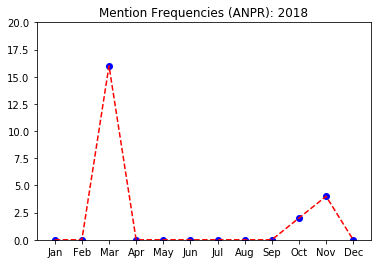

In [64]:
anprx18 = np.arange(12)
anpry18 = [val for key,val in anpr_months_dict18.items()]
anpr_months18 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.ylim(0, 20)
plt.title('Mention Frequencies (ANPR): 2018')
plt.plot(anprx18,anpry18, color = 'red', linestyle = '--')
plt.scatter(anprx18, anpry18, color="blue")
plt.xticks(anprx18, anpr_months18)

([<matplotlib.axis.XTick at 0x11e3a52b0>,
 <a list of 12 Text xticklabel objects>)

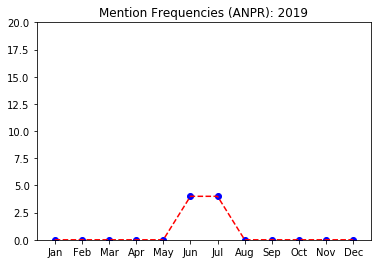

In [65]:
anprx19 = np.arange(12)
anpry19 = [val for key,val in anpr_months_dict19.items()]
anpr_months19 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.ylim(0, 20)
plt.title('Mention Frequencies (ANPR): 2019')
plt.plot(anprx19,anpry19, color = 'red', linestyle = '--')
plt.scatter(anprx19, anpry19, color="blue")
plt.xticks(anprx19, anpr_months19)

### 'EEA' 

In [33]:
def getdata_eea(file):
    with open(file, encoding="utf8") as textfile:
        reader = textfile.read()
        #filtering out headings, ending, and share button 
        file_without_head = reader[867:-354] #start 867
        f = file_without_head.replace(" Share  ", '')
        wordcount = Counter(f.split())
        total_count = sum(wordcount.values())
        eea = wordcount["EEA"]
        return eea

In [34]:
eea_months_dict16 = {'1': 0, '2': 0, '3': 0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0, '10':0, '11':0, '12':0}
eea_months_dict17 = {'1': 0, '2': 0, '3': 0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0, '10':0, '11':0, '12':0}
eea_months_dict18 = {'1': 0, '2': 0, '3': 0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0, '10':0, '11':0, '12':0}
eea_months_dict19 = {'1': 0, '2': 0, '3': 0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0, '10':0, '11':0, '12':0}

In [35]:


#grouping all files per month 
for filename in os.listdir('/Users/caoimherosemartin/Desktop/project/TMCI-Project-Nov-2019/mentions/Dates'):
    if filename[:4] == '2016': 
        month = filename[5:7]
        if month[0]=='0':
            month = month[1]
        count = eea_months_dict16[month]
        words = getdata_eea(filename)
        newcount = count + words 
        eea_months_dict16[month] = newcount
    if filename[:4] == '2017': 
        month = filename[5:7]
        if month[0]=='0':
            month = month[1]
        count = eea_months_dict17[month]
        words = getdata_eea(filename)
        newcount = count + words 
        eea_months_dict17[month] = newcount
    if filename[:4] == '2018': 
        month = filename[5:7]
        if month[0]=='0':
            month = month[1]
        count = eea_months_dict18[month]
        words = getdata_eea(filename)
        newcount = count + words 
        eea_months_dict18[month] = newcount
    if filename[:4] == '2019': 
        month = filename[5:7]
        if month[0]=='0':
            month = month[1]
        count = eea_months_dict19[month]
        words = getdata_eea(filename)
        newcount = count + words 
        eea_months_dict19[month] = newcount

In [36]:
print(eea_months_dict16)
print(eea_months_dict17)
print(eea_months_dict18)
print(eea_months_dict19)

{'1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 14, '7': 14, '8': 0, '9': 0, '10': 10, '11': 26, '12': 17}
{'1': 10, '2': 46, '3': 32, '4': 0, '5': 0, '6': 0, '7': 4, '8': 0, '9': 52, '10': 8, '11': 518, '12': 12}
{'1': 26, '2': 92, '3': 86, '4': 2, '5': 8, '6': 264, '7': 40, '8': 0, '9': 10, '10': 126, '11': 209, '12': 205}
{'1': 401, '2': 840, '3': 893, '4': 49, '5': 78, '6': 18, '7': 6, '8': 0, '9': 32, '10': 139, '11': 0, '12': 0}


#### Graphs

([<matplotlib.axis.XTick at 0x11ef29898>,
 <a list of 12 Text xticklabel objects>)

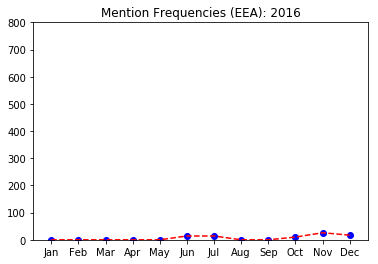

In [37]:
eeax16 = np.arange(12)
eeay16 = [val for key,val in eea_months_dict16.items()]

eea_months16 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.ylim(0, 800)
plt.title('Mention Frequencies (EEA): 2016')
plt.plot(eeax16,eeay16, color = 'red', linestyle = '--')
plt.scatter(eeax16, eeay16, color="blue")
plt.xticks(eeax16, eea_months16)

([<matplotlib.axis.XTick at 0x11ed8ebe0>,
 <a list of 12 Text xticklabel objects>)

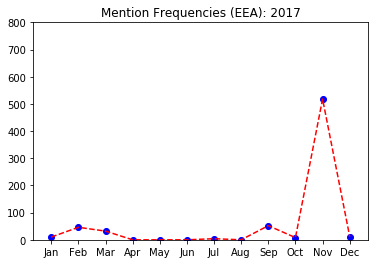

In [38]:
eeax17 = np.arange(12)
eeay17 = [val for key,val in eea_months_dict17.items()]

eea_months17 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.ylim(0, 800)
plt.title('Mention Frequencies (EEA): 2017')
plt.plot(eeax17,eeay17, color = 'red', linestyle = '--')
plt.scatter(eeax17, eeay17, color="blue")
plt.xticks(eeax17, eea_months17)

([<matplotlib.axis.XTick at 0x11de2efd0>,
 <a list of 12 Text xticklabel objects>)

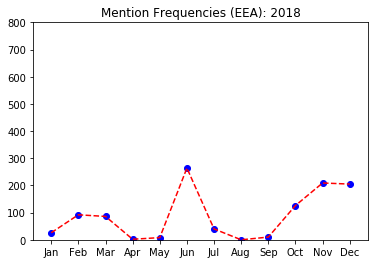

In [39]:
eeax18 = np.arange(12)
eeay18 = [val for key,val in eea_months_dict18.items()]

eea_months18 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.ylim(0, 800)
plt.title('Mention Frequencies (EEA): 2018')
plt.plot(eeax18,eeay18, color = 'red', linestyle = '--')
plt.scatter(eeax18, eeay18, color="blue")
plt.xticks(eeax18, eea_months18)

([<matplotlib.axis.XTick at 0x11df91358>,
 <a list of 12 Text xticklabel objects>)

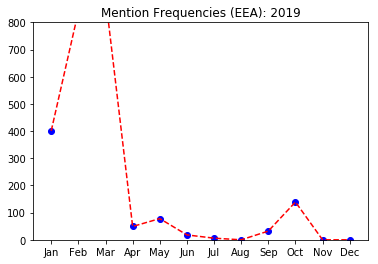

In [40]:
eeax19 = np.arange(12)
eeay19 = [val for key,val in eea_months_dict19.items()]

eea_months19 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.ylim(0, 800)
plt.title('Mention Frequencies (EEA): 2019')
plt.plot(eeax19,eeay19, color = 'red', linestyle = '--')
plt.scatter(eeax19, eeay19, color="blue")
plt.xticks(eeax19, eea_months19)

### 'CTA'

In [41]:
def getdata_cta(file):
    with open(file, encoding="utf8") as textfile:
        reader = textfile.read()
        #filtering out headings, ending, and share button 
        file_without_head = reader[867:-354] #start 867
        f = file_without_head.replace(" Share  ", '')
        wordcount = Counter(f.split())
        total_count = sum(wordcount.values())
        cta = wordcount["CTA"]
        return cta

In [42]:
cta_months_dict16 = {'1': 0, '2': 0, '3': 0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0, '10':0, '11':0, '12':0}
cta_months_dict17 = {'1': 0, '2': 0, '3': 0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0, '10':0, '11':0, '12':0}
cta_months_dict18 = {'1': 0, '2': 0, '3': 0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0, '10':0, '11':0, '12':0}
cta_months_dict19 = {'1': 0, '2': 0, '3': 0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0, '10':0, '11':0, '12':0}

In [43]:


#grouping all files per month 
for filename in os.listdir('/Users/caoimherosemartin/Desktop/project/TMCI-Project-Nov-2019/mentions/Dates'):
    if filename[:4] == '2016': 
        month = filename[5:7]
        if month[0]=='0':
            month = month[1]
        count = cta_months_dict16[month]
        words = getdata_cta(filename)
        newcount = count + words 
        cta_months_dict16[month] = newcount
    if filename[:4] == '2017': 
        month = filename[5:7]
        if month[0]=='0':
            month = month[1]
        count = cta_months_dict17[month]
        words = getdata_cta(filename)
        newcount = count + words 
        cta_months_dict17[month] = newcount
    if filename[:4] == '2018': 
        month = filename[5:7]
        if month[0]=='0':
            month = month[1]
        count = cta_months_dict18[month]
        words = getdata_cta(filename)
        newcount = count + words 
        cta_months_dict18[month] = newcount
    if filename[:4] == '2019': 
        month = filename[5:7]
        if month[0]=='0':
            month = month[1]
        count = cta_months_dict19[month]
        words = getdata_cta(filename)
        newcount = count + words 
        cta_months_dict19[month] = newcount

In [44]:
print(cta_months_dict16)
print(cta_months_dict17)
print(cta_months_dict18)
print(cta_months_dict19)

{'1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 6, '7': 102, '8': 0, '9': 8, '10': 0, '11': 0, '12': 0}
{'1': 0, '2': 0, '3': 6, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0, '9': 8, '10': 4, '11': 0, '12': 0}
{'1': 2, '2': 0, '3': 0, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0, '9': 0, '10': 0, '11': 10, '12': 0}
{'1': 12, '2': 4, '3': 0, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0, '9': 0, '10': 0, '11': 0, '12': 0}


#### Graphs

([<matplotlib.axis.XTick at 0x11d998550>,
 <a list of 12 Text xticklabel objects>)

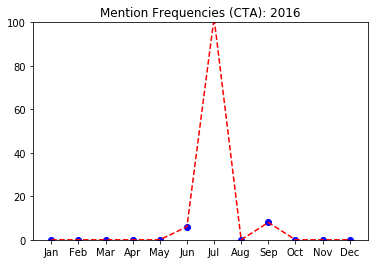

In [45]:
ctax16 = np.arange(12)
ctay16 = [val for key,val in cta_months_dict16.items()]

cta_months16 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.ylim(0, 100)
plt.title('Mention Frequencies (CTA): 2016')
plt.plot(ctax16,ctay16, color = 'red', linestyle = '--')
plt.scatter(ctax16, ctay16, color="blue")
plt.xticks(ctax16, cta_months16)

([<matplotlib.axis.XTick at 0x11ee82748>,
 <a list of 12 Text xticklabel objects>)

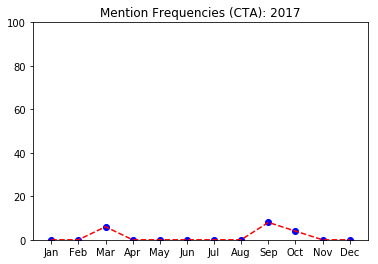

In [46]:
ctax17 = np.arange(12)
ctay17 = [val for key,val in cta_months_dict17.items()]

cta_months17 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.ylim(0, 100)
plt.title('Mention Frequencies (CTA): 2017')
plt.plot(ctax17,ctay17, color = 'red', linestyle = '--')
plt.scatter(ctax17, ctay17, color="blue")
plt.xticks(ctax17, cta_months17)

([<matplotlib.axis.XTick at 0x11de8cb38>,
 <a list of 12 Text xticklabel objects>)

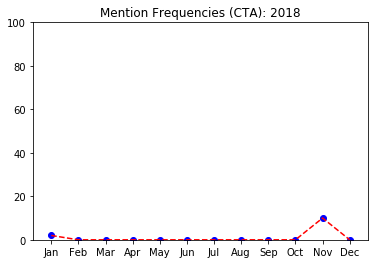

In [47]:
ctax18 = np.arange(12)
ctay18 = [val for key,val in cta_months_dict18.items()]

cta_months18 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.ylim(0, 100)
plt.title('Mention Frequencies (CTA): 2018')
plt.plot(ctax18,ctay18, color = 'red', linestyle = '--')
plt.scatter(ctax18, ctay18, color="blue")
plt.xticks(ctax18, cta_months18)

([<matplotlib.axis.XTick at 0x11d91a1d0>,
 <a list of 12 Text xticklabel objects>)

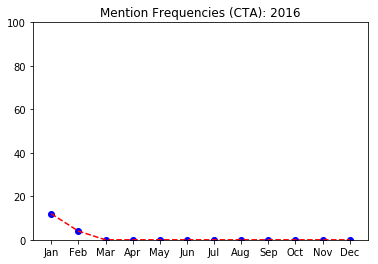

In [48]:
ctax19 = np.arange(12)
ctay19 = [val for key,val in cta_months_dict19.items()]

cta_months19 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.ylim(0, 100)
plt.title('Mention Frequencies (CTA): 2016')
plt.plot(ctax19,ctay19, color = 'red', linestyle = '--')
plt.scatter(ctax19, ctay19, color="blue")
plt.xticks(ctax19, cta_months19)

### 'Schengen'

In [49]:
def getdata_sch(file):
    with open(file, encoding="utf8") as textfile:
        reader = textfile.read()
        #filtering out headings, ending, and share button 
        file_without_head = reader[867:-354] #start 867
        f = file_without_head.replace(" Share  ", '')
        wordcount = Counter(f.split())
        total_count = sum(wordcount.values())
        sch = wordcount["Schengen"]
        return sch


In [50]:
sch_months_dict16 = {'1': 0, '2': 0, '3': 0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0, '10':0, '11':0, '12':0}
sch_months_dict17 = {'1': 0, '2': 0, '3': 0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0, '10':0, '11':0, '12':0}
sch_months_dict18 = {'1': 0, '2': 0, '3': 0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0, '10':0, '11':0, '12':0}
sch_months_dict19 = {'1': 0, '2': 0, '3': 0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0, '10':0, '11':0, '12':0}

In [51]:
for filename in os.listdir('/Users/caoimherosemartin/Desktop/project/TMCI-Project-Nov-2019/mentions/Dates'):
    if filename[:4] == '2016': 
        month = filename[5:7]
        if month[0]=='0':
            month = month[1]
        count = sch_months_dict16[month]
        words = getdata_sch(filename)
        newcount = count + words 
        sch_months_dict16[month] = newcount
    if filename[:4] == '2017': 
        month = filename[5:7]
        if month[0]=='0':
            month = month[1]
        count = sch_months_dict17[month]
        words = getdata_sch(filename)
        newcount = count + words 
        sch_months_dict17[month] = newcount
    if filename[:4] == '2018': 
        month = filename[5:7]
        if month[0]=='0':
            month = month[1]
        count = sch_months_dict18[month]
        words = getdata_sch(filename)
        newcount = count + words 
        sch_months_dict18[month] = newcount
    if filename[:4] == '2019': 
        month = filename[5:7]
        if month[0]=='0':
            month = month[1]
        count = sch_months_dict19[month]
        words = getdata_sch(filename)
        newcount = count + words 
        sch_months_dict19[month] = newcount

In [52]:
print(sch_months_dict16)
print(sch_months_dict17)
print(sch_months_dict18)
print(sch_months_dict19)

{'1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 18, '7': 2, '8': 0, '9': 0, '10': 8, '11': 3, '12': 6}
{'1': 54, '2': 0, '3': 78, '4': 4, '5': 0, '6': 2, '7': 2, '8': 0, '9': 4, '10': 10, '11': 0, '12': 64}
{'1': 6, '2': 6, '3': 6, '4': 0, '5': 4, '6': 2, '7': 0, '8': 0, '9': 4, '10': 0, '11': 14, '12': 18}
{'1': 16, '2': 13, '3': 2, '4': 4, '5': 0, '6': 0, '7': 2, '8': 0, '9': 12, '10': 6, '11': 0, '12': 0}


([<matplotlib.axis.XTick at 0x11d8b54e0>,
 <a list of 12 Text xticklabel objects>)

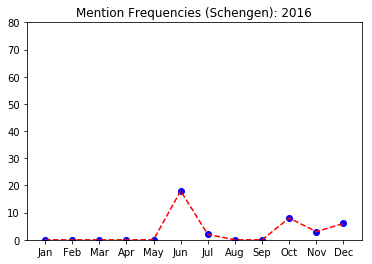

In [53]:
schx16 = np.arange(12)
schy16 = [val for key,val in sch_months_dict16.items()]

sch_months16 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.ylim(0, 80)
plt.title('Mention Frequencies (Schengen): 2016')
plt.plot(schx16,schy16, color = 'red', linestyle = '--')
plt.scatter(schx16, schy16, color="blue")
plt.xticks(schx16, sch_months16)

([<matplotlib.axis.XTick at 0x11f861828>,
 <a list of 12 Text xticklabel objects>)

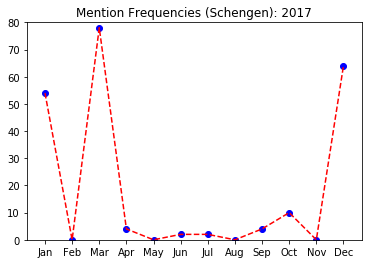

In [54]:
schx17 = np.arange(12)
schy17 = [val for key,val in sch_months_dict17.items()]

sch_months17 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.ylim(0, 80)
plt.title('Mention Frequencies (Schengen): 2017')
plt.plot(schx17,schy17, color = 'red', linestyle = '--')
plt.scatter(schx17, schy17, color="blue")
plt.xticks(schx17, sch_months17)

([<matplotlib.axis.XTick at 0x11e4ddb70>,
 <a list of 12 Text xticklabel objects>)

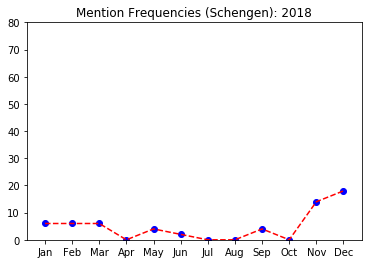

In [55]:
schx18 = np.arange(12)
schy18 = [val for key,val in sch_months_dict18.items()]

sch_months18 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.ylim(0, 80)
plt.title('Mention Frequencies (Schengen): 2018')
plt.plot(schx18,schy18, color = 'red', linestyle = '--')
plt.scatter(schx18, schy18, color="blue")
plt.xticks(schx18, sch_months18)

([<matplotlib.axis.XTick at 0x11e4cf080>,
 <a list of 12 Text xticklabel objects>)

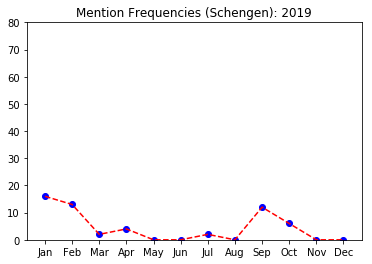

In [56]:
schx19 = np.arange(12)
schy19 = [val for key,val in sch_months_dict19.items()]

sch_months19 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.ylim(0, 80)
plt.title('Mention Frequencies (Schengen): 2019')
plt.plot(schx19,schy19, color = 'red', linestyle = '--')
plt.scatter(schx19, schy19, color="blue")
plt.xticks(schx19, sch_months19)

### 'no-deal'

In [57]:
def getdata_nd(file):
    with open(file, encoding="utf8") as textfile:
        reader = textfile.read()
        #filtering out headings, ending, and share button 
        file_without_head = reader[867:-354] #start 867
        f = file_without_head.replace(" Share  ", '')
        wordcount = Counter(f.split())
        total_count = sum(wordcount.values())
        nd = wordcount["no-deal"]
        return nd

In [58]:
nd_months_dict16 = {'1': 0, '2': 0, '3': 0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0, '10':0, '11':0, '12':0}
nd_months_dict17 = {'1': 0, '2': 0, '3': 0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0, '10':0, '11':0, '12':0}
nd_months_dict18 = {'1': 0, '2': 0, '3': 0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0, '10':0, '11':0, '12':0}
nd_months_dict19 = {'1': 0, '2': 0, '3': 0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0, '10':0, '11':0, '12':0}

In [59]:
for filename in os.listdir('/Users/caoimherosemartin/Desktop/project/TMCI-Project-Nov-2019/mentions/Dates'):
    if filename[:4] == '2016': 
        month = filename[5:7]
        if month[0]=='0':
            month = month[1]
        count = nd_months_dict16[month]
        words = getdata_nd(filename)
        newcount = count + words 
        nd_months_dict16[month] = newcount
    if filename[:4] == '2017': 
        month = filename[5:7]
        if month[0]=='0':
            month = month[1]
        count = nd_months_dict17[month]
        words = getdata_nd(filename)
        newcount = count + words 
        nd_months_dict17[month] = newcount
    if filename[:4] == '2018': 
        month = filename[5:7]
        if month[0]=='0':
            month = month[1]
        count = nd_months_dict18[month]
        words = getdata_nd(filename)
        newcount = count + words 
        nd_months_dict18[month] = newcount
    if filename[:4] == '2019': 
        month = filename[5:7]
        if month[0]=='0':
            month = month[1]
        count = nd_months_dict19[month]
        words = getdata_nd(filename)
        newcount = count + words 
        nd_months_dict19[month] = newcount

In [60]:
print(nd_months_dict16)
print(nd_months_dict17)
print(nd_months_dict18)
print(nd_months_dict19)

{'1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0, '9': 0, '10': 0, '11': 0, '12': 0}
{'1': 0, '2': 0, '3': 8, '4': 0, '5': 0, '6': 0, '7': 2, '8': 0, '9': 10, '10': 149, '11': 98, '12': 20}
{'1': 26, '2': 78, '3': 24, '4': 8, '5': 16, '6': 36, '7': 92, '8': 0, '9': 51, '10': 280, '11': 410, '12': 864}
{'1': 1477, '2': 1844, '3': 1680, '4': 477, '5': 428, '6': 546, '7': 482, '8': 0, '9': 1013, '10': 908, '11': 4, '12': 0}


#### Graphs

([<matplotlib.axis.XTick at 0x11e394390>,
 <a list of 12 Text xticklabel objects>)

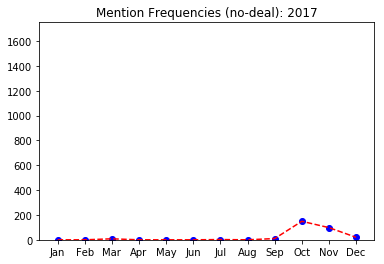

In [61]:
ndx17 = np.arange(12)
ndy17 = [val for key,val in nd_months_dict17.items()]

nd_months17 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.ylim(0, 1750)
plt.title('Mention Frequencies (no-deal): 2017')
plt.plot(ndx17,ndy17, color = 'red', linestyle = '--')
plt.scatter(ndx17, ndy17, color="blue")
plt.xticks(ndx17, nd_months17)

([<matplotlib.axis.XTick at 0x11ea6e828>,
 <a list of 12 Text xticklabel objects>)

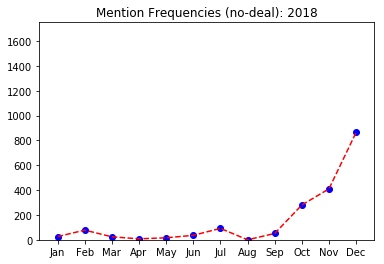

In [62]:
ndx18 = np.arange(12)
ndy18 = [val for key,val in nd_months_dict18.items()]

nd_months18 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.ylim(0, 1750)
plt.title('Mention Frequencies (no-deal): 2018')
plt.plot(ndx18,ndy18, color = 'red', linestyle = '--')
plt.scatter(ndx18, ndy18, color="blue")
plt.xticks(ndx18, nd_months18)

([<matplotlib.axis.XTick at 0x11e421f98>,
 <a list of 12 Text xticklabel objects>)

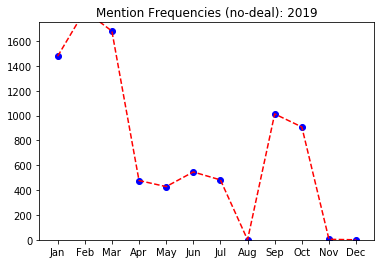

In [63]:
ndx19 = np.arange(12)
ndy19 = [val for key,val in nd_months_dict19.items()]

nd_months19 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.ylim(0, 1750)
plt.title('Mention Frequencies (no-deal): 2019')
plt.plot(ndx19,ndy19, color = 'red', linestyle = '--')
plt.scatter(ndx19, ndy19, color="blue")
plt.xticks(ndx19, nd_months19)